In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
#scaling
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
model = tf.keras.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer , 10 classes from 0 to 9

In [7]:
model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [8]:
#fit the model :
model.fit(x_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2006 - accuracy: 0.9398
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0845 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0588 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0440 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0213 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0162 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9795


[0.08608250319957733, 0.9794999957084656]

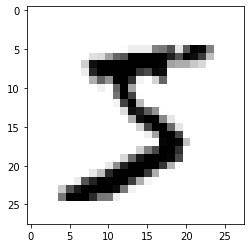

In [10]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [11]:
print(y_train[0])

5


In [12]:
model.save('Mnist.model')

INFO:tensorflow:Assets written to: Mnist.model/assets


In [14]:
new_model = tf.keras.models.load_model('Mnist.model')
predictions = new_model.predict(x_test)

In [15]:
print(np.argmax(predictions[0]))

7


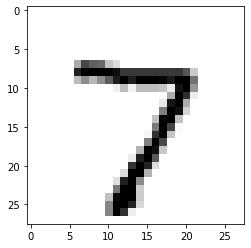

In [16]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [17]:
# argmax ==> get the indices of the maximum element